# Basic feature interrelation analysis of COCONUT dataset using the 'fip3' library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import csv
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

In [11]:
DATASET_NAME = 'COCONUT'
OUTPUT_FIGURE_PATH = '../images/COCONUTF'

FEATURE_NAME = 'ECFP2-like substructures'


HYBRID_FEATURES_NAME = FEATURES_NAME + " and COCONUT activities"

REFERENCE_DATASET_NAME = 'COCONUT_DM'


## Loading an interrelation profile
From interrelation files already preprocessed by scripts in fip3/scripts

In [3]:
p = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
p.df

value
feature1                                           feature2                                                 
[CH2][CH2][CH2][CH2][CH]                           [CH2][CH2][CH2][CH2][CH]                            15582
                                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]         11
                                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]                    139
                                                   [CH3][CH2][CH2][CH2]                                 7133
                                                   [CH3][CH2][CH2][CH2][CH2]                            6905
...                                                                                                      ...
[C][c]([c])[cH][cH][cH]                            [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[C][c]([c])[c]([OH])[cH][cH]                       [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[C][c]([c])[c]([cH][cH])[C]([C])=[O]               [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[cH][cH][cH][c]([c])[OH]                           [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...      1
[c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([... [c][cH][cH][cH][c]                                      1

[18368174 rows x 1 columns]

## General characterization of a co-occurrence profile

In [4]:
print(f"There are {len(p.distinct_features())} distinct {FEATURES_NAME} within {DATASET_NAME}.")

There are 301044 distinct ECFP2-like substructures within COCONUT.


In [5]:
self_relations_values = p.select_self_relations()['value']
self_relations_values

feature1                                        feature2                                      
[CH2][CH2][CH2][CH2][CH]                        [CH2][CH2][CH2][CH2][CH]                          15582
[CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]  [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]       17
[CH2][CH2][C](=[O])[CH]([CH2])[CH]              [CH2][CH2][C](=[O])[CH]([CH2])[CH]                  354
[CH3][CH2][CH2][CH2]                            [CH3][CH2][CH2][CH2]                              24614
[CH3][CH2][CH2][CH2][CH2]                       [CH3][CH2][CH2][CH2][CH2]                         20386
                                                                                                  ...  
[N][C](=[O])[NH][c]([n])[n]                     [N][C](=[O])[NH][c]([n])[n]                           1
[c][cH][c]([c]([cH])=[O])[C]([CH3])([CH3])[OH]  [c][cH][c]([c]([cH])=[O])[C]([CH3])([CH3])[OH]        1
[c][c]([c])[c]([cH][nH])[CH2][NH3+]             [c][c]([c])[c]([cH][nH])[

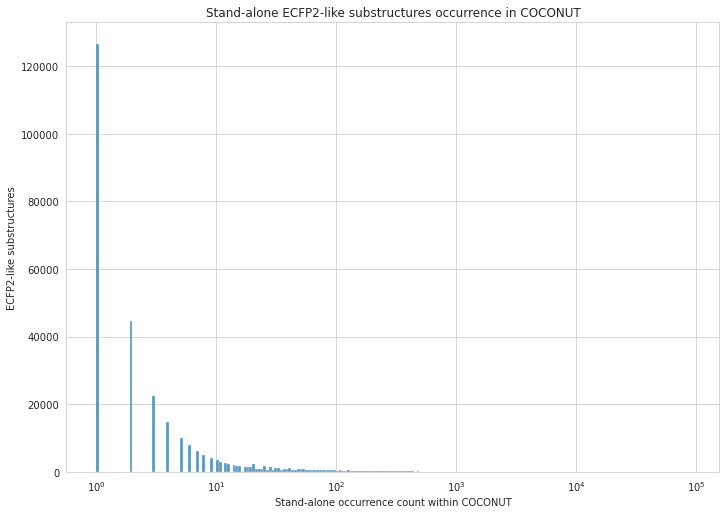

In [6]:
title = f"Stand-alone {FEATURES_NAME} occurrence in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(self_relations_values, log_scale=True)
ax.set(title=title, xlabel=f"Stand-alone occurrence count within {DATASET_NAME}", ylabel=f"{FEATURES_NAME}")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [7]:
cooccurrence_values = p.select_raw_interrelations()['value']
cooccurrence_values

feature1                                                  feature2                                                
[CH2][CH2][CH2][CH2][CH]                                  [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]                11
                                                          [CH2][CH2][C](=[O])[CH]([CH2])[CH]                           139
                                                          [CH3][CH2][CH2][CH2]                                        7133
                                                          [CH3][CH2][CH2][CH2][CH2]                                   6905
                                                          [CH3][O][C]([CH2])=[O]                                       325
                                                                                                                      ... 
[C][c]([c])[cH][cH][cH]                                   [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([CH2])[OH]       1
[C][c]([c])[c]([OH])[cH]

In [8]:
print(f"There is in total {self_relations_values.sum()} feature stand-alone occurrences and \
{cooccurrence_values.sum()} feature co-occurrences for {FEATURES_NAME} within {DATASET_NAME}")

There is in total 8924517 feature stand-alone occurrences and 124970484 feature co-occurrences for ECFP2-like substructures within COCONUT


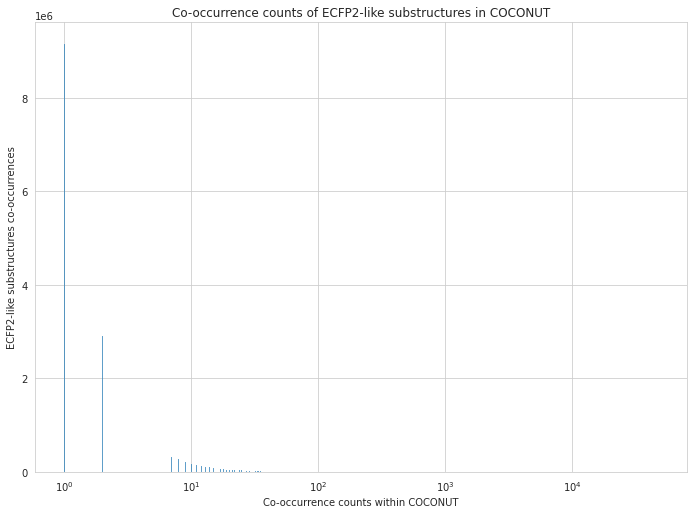

In [9]:
title = f"Co-occurrence counts of {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(cooccurrence_values, log_scale=True)
ax.set(title=title, xlabel=f"Co-occurrence counts within {DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} co-occurrences")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [10]:
print(f"The maximum theoretical number of different feature interrelations of the observed {FEATURES_NAME} \
within {DATASET_NAME} would be {int(p.num_max_interrelations())}, whereas the number of actual observed \
interrelations is only {p.num_raw_interrelations()}. Therefore, the interrelation matrix population ratio is \
approx. {p.num_raw_interrelations() / p.num_max_interrelations():.4f}.")

The maximum theoretical number of different feature interrelations of the observed ECFP2-like substructures within COCONUT would be 45313594446, whereas the number of actual observed interrelations is only 18067130. Therefore, the interrelation matrix population ratio is approx. 0.0004.


In [11]:
print(f"The mean co-occurrence value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean co-occurrence value for ECFP2-like substructures within COCONUT is 6.92, with the standard deviation of 61.69. The mean stand-alone value is 29.65, with the standard deviation of 407.73.


## General characterization of pointwise mutual information profile

In [12]:
p = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    p)
p

In [13]:
p.select_self_relations()['value']

feature1                                        feature2                                      
[CH2][CH2][CH2][CH2][CH]                        [CH2][CH2][CH2][CH2][CH]                          0.040337
[CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]  [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]    0.000044
[CH2][CH2][C](=[O])[CH]([CH2])[CH]              [CH2][CH2][C](=[O])[CH]([CH2])[CH]                0.000916
[CH3][CH2][CH2][CH2]                            [CH3][CH2][CH2][CH2]                              0.063718
[CH3][CH2][CH2][CH2][CH2]                       [CH3][CH2][CH2][CH2][CH2]                         0.052773
                                                                                                    ...   
[N][C](=[O])[NH][c]([n])[n]                     [N][C](=[O])[NH][c]([n])[n]                       0.000003
[c][cH][c]([c]([cH])=[O])[C]([CH3])([CH3])[OH]  [c][cH][c]([c]([cH])=[O])[C]([CH3])([CH3])[OH]    0.000003
[c][c]([c])[c]([cH][nH])[CH2][NH3+]             [

In [14]:
p.select_self_relations()['value'].min()

2.5886817655845113e-06

In [15]:
p.select_raw_interrelations()['value'].min()

2.5886817655845113e-06

In [ ]:
p = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(p)

p

In [ ]:
p.df

In [ ]:
pmi_values = p.select_raw_interrelations()['value']
pmi_values

In [ ]:
title = f"PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(pmi_values, binwidth=0.25)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [ ]:
print(f"The mean PMI value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

In [ ]:
major_pmi_values = p.select_major_interrelations(2)['value']
major_pmi_values

In [ ]:
title = f"Major PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(major_pmi_values, binwidth=0.5)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [ ]:
p.mean_raw_interrelation_value()

## Comparing profiles using Pointwise KL Divergence

In [4]:
q = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
r = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(q)
r.df

value
feature1                           feature2                                   
[CH2][CH2][CH2][CH2][CH2]          [CH2][CH2][CH2][CH2][CH2]          0.052777
                                   [CH2][CH2][S][c]([n])[n]           0.000377
                                   [C][CH2][CH2][CH2][CH2]            0.009464
                                   [cH][cH][cH][cH][cH]               0.007393
                                   [cH][cH][cH][cH][c]                0.011546
...                                                                        ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]  0.000003
                                   [C][CH]([CH2])[NH][CH2][S]         0.000003
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]         0.000003
                                   [C][CH]([NH])[CH2][CH2][S]         0.000003
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]         0.000003

[13960003 rows x 1 columns]

In [5]:
%%time
s = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
s.df
t = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(s)
t.df

CPU times: user 21.3 s, sys: 2.14 s, total: 23.4 s
Wall time: 24.4 s


value
feature1                                           feature2                                                    
[CH2][CH2][CH2][CH2][CH]                           [CH2][CH2][CH2][CH2][CH]                            0.040337
                                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]      0.000028
                                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]                  0.000360
                                                   [CH3][CH2][CH2][CH2]                                0.018465
                                                   [CH3][CH2][CH2][CH2][CH2]                           0.017875
...                                                                                                         ...
[C][c]([c])[cH][cH][cH]                            [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[C][c]([c])[c]([OH])[cH][cH]                       [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[C][c]([c])[c]([cH][cH])[C]([C])=[O]               [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[cH][cH][cH][c]([c])[OH]                           [c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([...  0.000003
[c][C](=[O])[C]([OH])([CH]([CH2])[O])[C]([C])([... [c][cH][cH][cH][c]                                  0.000003

[18368174 rows x 1 columns]

In [6]:
%%time
k = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(t,r)
k.df

CPU times: user 29.1 s, sys: 5.34 s, total: 34.4 s
Wall time: 34.5 s


value
feature1                           feature2                                                
[CH2][CH2][CH2][CH2][CH]           [CH2][CH2][CH2][CH2][CH]                        1.847558
                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]  3.431965
                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]              5.091474
                                   [CH3][CH2][CH2][CH2]                            4.187864
                                   [CH3][CH2][CH2][CH2][CH2]                       4.440557
...                                                                                     ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]              -0.027471
                                   [C][CH]([CH2])[NH][CH2][S]                     -0.027471
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]                     -0.027471
                                   [C][CH]([NH])[CH2][CH2][S]                     -0.027471
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]                     -0.027471

[30685450 rows x 1 columns]

In [7]:
k.df.nlargest(50,"value")

value
feature1                                           feature2                                                     
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([CH])[C](=[O])[O][CH]                     11.962995
[CH2][CH]([O])[CH2][O][P]                          [CH]=[CH][CH2][CH2][CH2]                            11.586323
                                                   [CH][CH2][CH2][CH2][CH2]                            11.583097
[CH][O][CH2][CH]([CH])[OH]                         [C]=[CH][CH2][CH]([C])[C]                           11.531910
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C][CH2][CH2][CH]([C])[C]                           11.517015
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH2][O][CH]([CH])[O]                           11.490694
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [C][C](=[O])[O][CH]([CH])[CH]                       11.402989
[CH][CH]([OH])[CH]([OH])[CH2][O]                   [C]=[CH][CH2][CH]([C])[C]                           11.358395
[C]=[CH][CH2][CH]([C])[C]                          [C][C](=[O])[O][CH]([CH])[O]                        11.336668
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]               11.309043
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]               11.286554
[CH][CH]([O])[CH2][OH]                             [CH][O][CH]([CH3])[CH]([CH])[O]                     11.280872
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C]=[CH][CH2][CH]([C])[C]                           11.268880
[CH3][CH]([CH])[O][CH]([CH])[O]                    [C]=[CH][CH2][CH]([C])[C]                           11.242248
[CH][O][CH]([CH2][OH])[CH]([CH])[OH]               [CH][O][CH]([CH3])[CH]([CH])[O]                     11.192307
[CH][CH2][CH]=[C]([CH])[C]                         [CH][CH2][O][CH]([CH])[O]                           11.183813
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][O][CH2][CH]([CH])[OH]                          11.177715
[CH3][CH]([CH])[O][CH]([CH])[O]                    [CH][CH2][CH2][C]([CH])([CH3])[CH]                  11.157408
[CH2][CH]([C])[O][CH]([CH])[O]                     [CH][O][CH]([O][CH2])[CH]([CH])[OH]                 11.123550
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH][CH]([OH])[CH]([OH])[CH]([O])[O]                11.117828
[C][c]([c])[cH][cH][c]                             [c][CH]=[C]([O][c])[C]([c])=[O]                     11.117510
[c][CH]([CH])[O][c]([c])[c]                        [c][CH]([CH])[O][c]([c])[c]                         11.100527
[CH]=[C]([O])[C](=[O])[c]([cH])[c]                 [CH]=[C]([O])[C](=[O])[c]([cH])[c]                  11.064629
                                                   [C][c]([c])[cH][cH][c]                              11.036602
[CH2][CH2][CH]([O][CH])[C]([CH3])([CH3])[CH]       [CH][CH2][CH2][C]([CH])([CH3])[CH]                  11.012138
[CH][CH2][CH2][C]([CH])([CH3])[CH]                 [CH][O][CH]([CH3])[CH]([CH])[OH]                    11.008020
[CH][CH]([OH])[CH]([OH])[CH]([CH2])[OH]            [C]=[CH][CH2][CH]([C])[C]                           11.003893
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH][CH]([OH])[CH]([OH])[CH]([CH])[OH]              11.003890
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH]([OH])[CH]([OH])[CH2][O]                    10.992819
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [C][C](=[O])[O][CH]([CH])[CH]                       10.985860
[CH3][CH]([CH])[O][CH]([CH])[O]                    [CH][CH2][CH]=[C]([CH])[C]                          10.969010
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH2][CH2][CH]([O][CH])[C]([CH3])([CH3])[CH]        10.967594
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH3][CH]([CH])[O][CH]([CH])[O]                     10.961222
[CH]=[C]([O])[C](=[O])[c]([cH])[c]                 [c][CH]=[C]([O][c])[C]([c])=[O]                     10.959797
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C

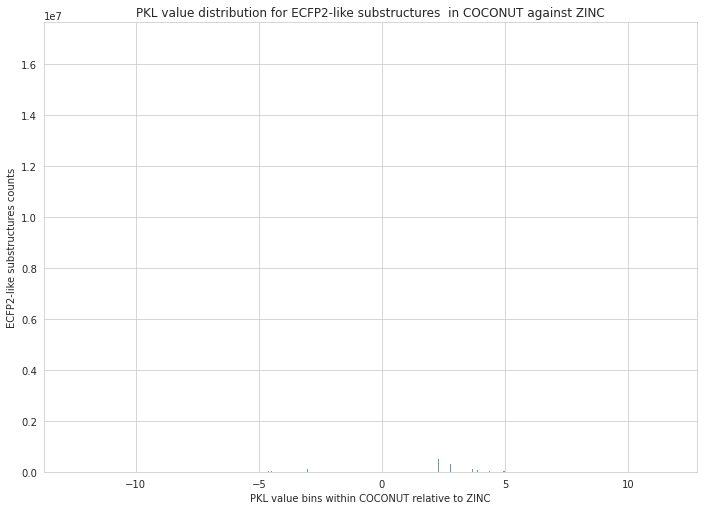

In [12]:
title = f"PKL value distribution for {FEATURE_NAME}  in {DATASET_NAME} against ZINC"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(k.select_raw_interrelations()['value'])
ax.set(title=title, xlabel=f"PKL value bins within {DATASET_NAME} relative to ZINC",
       ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(k.df.sort_values('value', ascending=False)[:100])

value
feature1                                           feature2                                                     
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([CH])[C](=[O])[O][CH]                     11.962995
[CH2][CH]([O])[CH2][O][P]                          [CH]=[CH][CH2][CH2][CH2]                            11.586323
                                                   [CH][CH2][CH2][CH2][CH2]                            11.583097
[CH][O][CH2][CH]([CH])[OH]                         [C]=[CH][CH2][CH]([C])[C]                           11.531910
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C][CH2][CH2][CH]([C])[C]                           11.517015
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH2][O][CH]([CH])[O]                           11.490694
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [C][C](=[O])[O][CH]([CH])[CH]                       11.402989
[CH][CH]([OH])[CH]([OH])[CH2][O]                   [C]=[CH][CH2][CH]([C])[C]                           11.358395
[C]=[CH][CH2][CH]([C])[C]                          [C][C](=[O])[O][CH]([CH])[O]                        11.336668
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]               11.309043
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]               11.286554
[CH][CH]([O])[CH2][OH]                             [CH][O][CH]([CH3])[CH]([CH])[O]                     11.280872
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C]=[CH][CH2][CH]([C])[C]                           11.268880
[CH3][CH]([CH])[O][CH]([CH])[O]                    [C]=[CH][CH2][CH]([C])[C]                           11.242248
[CH][O][CH]([CH2][OH])[CH]([CH])[OH]               [CH][O][CH]([CH3])[CH]([CH])[O]                     11.192307
[CH][CH2][CH]=[C]([CH])[C]                         [CH][CH2][O][CH]([CH])[O]                           11.183813
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][O][CH2][CH]([CH])[OH]                          11.177715
[CH3][CH]([CH])[O][CH]([CH])[O]                    [CH][CH2][CH2][C]([CH])([CH3])[CH]                  11.157408
[CH2][CH]([C])[O][CH]([CH])[O]                     [CH][O][CH]([O][CH2])[CH]([CH])[OH]                 11.123550
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH][CH]([OH])[CH]([OH])[CH]([O])[O]                11.117828
[C][c]([c])[cH][cH][c]                             [c][CH]=[C]([O][c])[C]([c])=[O]                     11.117510
[c][CH]([CH])[O][c]([c])[c]                        [c][CH]([CH])[O][c]([c])[c]                         11.100527
[CH]=[C]([O])[C](=[O])[c]([cH])[c]                 [CH]=[C]([O])[C](=[O])[c]([cH])[c]                  11.064629
                                                   [C][c]([c])[cH][cH][c]                              11.036602
[CH2][CH2][CH]([O][CH])[C]([CH3])([CH3])[CH]       [CH][CH2][CH2][C]([CH])([CH3])[CH]                  11.012138
[CH][CH2][CH2][C]([CH])([CH3])[CH]                 [CH][O][CH]([CH3])[CH]([CH])[OH]                    11.008020
[CH][CH]([OH])[CH]([OH])[CH]([CH2])[OH]            [C]=[CH][CH2][CH]([C])[C]                           11.003893
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH][CH]([OH])[CH]([OH])[CH]([CH])[OH]              11.003890
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH]([OH])[CH]([OH])[CH2][O]                    10.992819
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [C][C](=[O])[O][CH]([CH])[CH]                       10.985860
[CH3][CH]([CH])[O][CH]([CH])[O]                    [CH][CH2][CH]=[C]([CH])[C]                          10.969010
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C]([CH])(... [CH2][CH2][CH]([O][CH])[C]([CH3])([CH3])[CH]        10.967594
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH3][CH]([CH])[O][CH]([CH])[O]                     10.961222
[CH]=[C]([O])[C](=[O])[c]([cH])[c]                 [c][CH]=[C]([O][c])[C]([c])=[O]                     10.959797
[CH2][CH2][CH]([C]([CH])([CH3])[CH2])[C

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(k.df.sort_values('value', ascending=True)[:100])

value
feature1                                    feature2                                              
[c][NH][C](=[O])[CH2][S]                    [c][n][n][c]([n])[S]                        -12.511538
[c][N]([S])[CH2][C]([NH])=[O]               [c][N]([S])[CH2][C]([NH])=[O]               -12.146732
[CH]=[c]([c])[s][c](=[N])[n]                [CH]=[c]([c])[s][c](=[N])[n]                -11.669071
                                            [c][CH]=[c]([s][c])[c]([n])=[O]             -11.647691
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [CH]=[c]([s])[c](=[O])[n]([c])[CH]          -11.642181
[C][N]=[c]([s][c])[n]([c])[CH]              [C][N]=[c]([s][c])[n]([c])[CH]              -11.640800
[CH]=[c]([c])[s][c](=[N])[n]                [CH]=[c]([s])[c](=[O])[n]([c])[CH]          -11.638495
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [c][CH]=[c]([s][c])[c]([n])=[O]             -11.622262
[C][CH2][S][c]([n])[n]                      [c][n][n][c]([CH2])[n]                      -11.594472
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [C][N]=[c]([s][c])[n]([c])[CH]              -11.586848
[CH]=[c]([c])[s][c](=[N])[n]                [C][N]=[c]([s][c])[n]([c])[CH]              -11.586848
[C][N]=[c]([s][c])[n]([c])[CH]              [c][CH]=[c]([s][c])[c]([n])=[O]             -11.568567
[cH][c]([cH])[NH][C]([CH2])=[O]             [c][n][n][c]([n])[S]                        -11.412794
[c]-[n]([c])[c]([n][n])[S][CH2]             [c][NH][C](=[O])[CH2][S]                    -11.372876
[c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]   [c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]   -11.359507
[C][N]([CH2])[CH]([CH3])[C]([NH])=[O]       [c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]   -11.359507
[c]-[c]([n])[n][n][c]                       [c][NH][C](=[O])[CH2][S]                    -11.336378
[C]=[C]([CH3])[N]=[c]([n])[s]               [C]=[C]([CH3])[N]=[c]([n])[s]               -11.311716
[C][C]([CH])=[C]([CH3])[N]=[c]              [C][N]=[c]([s][c])[n]([c])[CH]              -11.311138
[C]=[C]([CH3])[N]=[c]([n])[s]               [C][C]([CH])=[C]([CH3])[N]=[c]              -11.311138
                                            [C][N]=[c]([s][c])[n]([c])[CH]              -11.311138
[C][C]([CH])=[C]([CH3])[N]=[c]              [C][C]([CH])=[C]([CH3])[N]=[c]              -11.311138
[C][CH2][S][c]([n])[n]                      [c][n]([CH2])[c]([n][n])[S][CH2]            -11.286625
[CH]=[c]([c])[s][c](=[N])[n]                [C]=[C]([CH3])[N]=[c]([n])[s]               -11.249662
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [C][C]([CH])=[C]([CH3])[N]=[c]              -11.249058
[CH]=[c]([c])[s][c](=[N])[n]                [C][C]([CH])=[C]([CH3])[N]=[c]              -11.249058
[CH]=[c]([s])[c](=[O])[n]([c])[CH]          [C]=[C]([CH3])[N]=[c]([n])[s]               -11.249058
[C]=[C]([CH3])[N]=[c]([n])[s]               [c][CH]=[c]([s][c])[c]([n])=[O]             -11.230819
[C][C]([CH])=[C]([CH3])[N]=[c]              [c][CH]=[c]([s][c])[c]([n])=[O]             -11.230207
[c][N]([S])[CH2][C]([NH])=[O]               [c][cH][cH][cH][cH]                         -11.198018
[cH][c]([cH])-[n]([c]([n])[S])[c]([c])=[O]  [c]-[n]([c])[c]([n][c])[S][CH2]             -11.187338
[c][cH][cH][c]([cH])[NH]                    [c][n][n][c]([n])[S]                        -11.176583
[c][S][CH2][C]([NH])=[O]                    [c][n][n][c]([CH2])[n]                      -11.175947
[c][N]([CH2])[S](=[O])(=[O])[c]([cH])[cH]   [c][N]([S])[CH2][C]([NH])=[O]               -11.169574
[C]=[C]([CH])[C](=[O])[O][CH2]              [C][N]=[c]([s][c])[n]([c])[CH]              -11.157398
[c][NH][C](=[O])[CH2][N]                    [c][N]([S])[CH2][C]([NH])=[O]               -11.150299
[C][CH]([c])[n]([c]([c])=[O])[c](=[N])[s]   [C][CH]([c])[n]([c]([c])=[O])[c](=[N])[s]   -11.139258
                                            [C][N]=[c]([s][c])[n]([c])[CH]              -11.139258
[C]=[C]([CH])[C](=[O])[O][CH2]              [c][CH]=[c]([s][c])[c]([n])=[O]             -11.131414
[CH]=[c]([c])[s][c](=[N])[n]      

## Comparing profiles using Pointwise Jeffreys Divergence

In [15]:
j = profiles.PointwiseJeffreysDivergenceProfile.from_cooccurrence_probability_profiles(t,r)
j.df

value
feature1                           feature2                                                 
[CH2][CH2][CH2][CH2][CH]           [CH2][CH2][CH2][CH2][CH]                         3.695116
                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]   6.863929
                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]              10.182948
                                   [CH3][CH2][CH2][CH2]                             8.375728
                                   [CH3][CH2][CH2][CH2][CH2]                        8.881113
...                                                                                      ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]                0.054941
                                   [C][CH]([CH2])[NH][CH2][S]                       0.054941
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]                       0.054941
                                   [C][CH]([NH])[CH2][CH2][S]                       0.054941
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]                       0.054941

[30685450 rows x 1 columns]

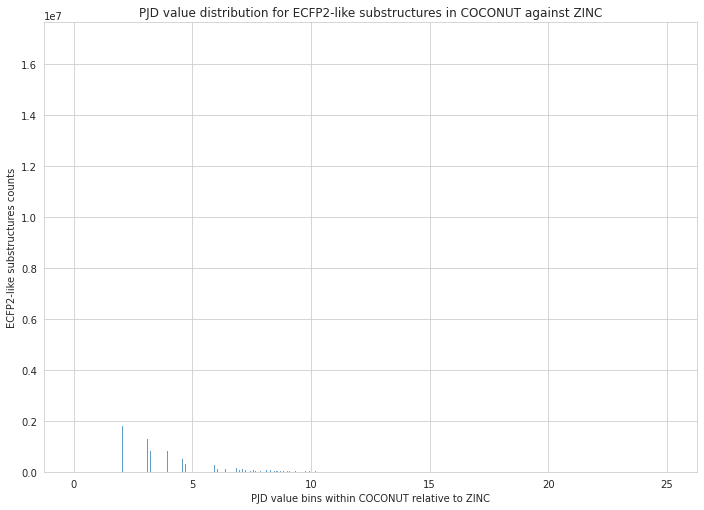

In [16]:
title = f"PJD value distribution for {FEATURE_NAME} in {DATASET_NAME} against ZINC"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(j.select_raw_interrelations()['value'])
ax.set(title=title, xlabel=f"PJD value bins within {DATASET_NAME} relative to ZINC",
       ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(j.df.sort_values('value', ascending=False)[:100])

value
feature1                                           feature2                                               
[c][NH][C](=[O])[CH2][S]                           [c][n][n][c]([n])[S]                          25.023077
[c][N]([S])[CH2][C]([NH])=[O]                      [c][N]([S])[CH2][C]([NH])=[O]                 24.293465
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([CH])[C](=[O])[O][CH]               23.925991
[CH]=[c]([c])[s][c](=[N])[n]                       [CH]=[c]([c])[s][c](=[N])[n]                  23.338142
                                                   [c][CH]=[c]([s][c])[c]([n])=[O]               23.295381
[CH]=[c]([s])[c](=[O])[n]([c])[CH]                 [CH]=[c]([s])[c](=[O])[n]([c])[CH]            23.284361
[C][N]=[c]([s][c])[n]([c])[CH]                     [C][N]=[c]([s][c])[n]([c])[CH]                23.281599
[CH]=[c]([c])[s][c](=[N])[n]                       [CH]=[c]([s])[c](=[O])[n]([c])[CH]            23.276991
[CH]=[c]([s])[c](=[O])[n]([c])[CH]                 [c][CH]=[c]([s][c])[c]([n])=[O]               23.244524
[C][CH2][S][c]([n])[n]                             [c][n][n][c]([CH2])[n]                        23.188945
[CH]=[c]([c])[s][c](=[N])[n]                       [C][N]=[c]([s][c])[n]([c])[CH]                23.173696
[CH]=[c]([s])[c](=[O])[n]([c])[CH]                 [C][N]=[c]([s][c])[n]([c])[CH]                23.173696
[CH2][CH]([O])[CH2][O][P]                          [CH]=[CH][CH2][CH2][CH2]                      23.172645
                                                   [CH][CH2][CH2][CH2][CH2]                      23.166193
[C][N]=[c]([s][c])[n]([c])[CH]                     [c][CH]=[c]([s][c])[c]([n])=[O]               23.137135
[CH][O][CH2][CH]([CH])[OH]                         [C]=[CH][CH2][CH]([C])[C]                     23.063820
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C][CH2][CH2][CH]([C])[C]                     23.034029
[CH2][CH2][C]([CH3])([CH]([C])[CH2])[CH]([CH2])[C] [CH][CH2][O][CH]([CH])[O]                     22.981389
[cH][c]([cH])[NH][C]([CH2])=[O]                    [c][n][n][c]([n])[S]                          22.825588
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [C][C](=[O])[O][CH]([CH])[CH]                 22.805979
[c]-[n]([c])[c]([n][n])[S][CH2]                    [c][NH][C](=[O])[CH2][S]                      22.745752
[C][N]([CH2])[CH]([CH3])[C]([NH])=[O]              [c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]     22.719014
[c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]          [c][CH2][N]([C]([CH2])=[O])[CH]([C])[CH3]     22.719014
[CH][CH]([OH])[CH]([OH])[CH2][O]                   [C]=[CH][CH2][CH]([C])[C]                     22.716791
[C]=[CH][CH2][CH]([C])[C]                          [C][C](=[O])[O][CH]([CH])[O]                  22.673335
[c]-[c]([n])[n][n][c]                              [c][NH][C](=[O])[CH2][S]                      22.672757
[C]=[C]([CH3])[N]=[c]([n])[s]                      [C]=[C]([CH3])[N]=[c]([n])[s]                 22.623433
[C][C]([CH])=[C]([CH3])[N]=[c]                     [C][C]([CH])=[C]([CH3])[N]=[c]                22.622276
                                                   [C][N]=[c]([s][c])[n]([c])[CH]                22.622276
[C]=[C]([CH3])[N]=[c]([n])[s]                      [C][N]=[c]([s][c])[n]([c])[CH]                22.622276
                                                   [C][C]([CH])=[C]([CH3])[N]=[c]                22.622276
[CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]              [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]         22.618087
[C][CH2][S][c]([n])[n]                             [c][n]([CH2])[c]([n][n])[S][CH2]              22.573251
[CH2]=[C]([CH])[C](=[O])[O][CH]                    [CH2]=[C]([C](=[O])[O])[CH]([CH])[CH]         22.573107
[CH][CH]([O])[CH2][OH]                             [CH][O][CH]([CH3])[CH]([CH])[O]               22.561744
[CH][O][CH]([O][CH2])[CH]([CH])[OH]                [C]=[CH][CH2][CH]([C])[C]                     22.537759
[CH]=[c]([c])[s][c](=[N])[n]       

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(j.df.sort_values('value', ascending=True)[:100])

,,value
feature1,feature2,
[cH][cH][c]([Cl])[c]([c])[O],[cH][cH][c]([Cl])[c]([c])[O],0.000028
[C][C](=[O])[NH][C]([N])=[O],[c][c]([c])[O][CH3],0.000028
[CH2][CH2][CH2][CH2][S],[cH][cH][cH][cH][cH],0.000028
[cH][cH][cH][cH][cH],[cH][c]([c])[C](=[O])[N]([CH2])[CH],0.000028
[cH][cH][cH][c]([cH])[CH2],[c][NH][C](=[O])[CH2][CH],0.000028
[CH]=[CH][c]([cH][c])[cH][cH],[cH][cH][cH][cH][c],0.000028
[cH][c]([CH2])[cH][c]([c])[cH],[c][cH][cH][cH][cH],0.000556
[c][CH2][CH2][c]([c])[n],[c][CH2][CH2][c]([c])[n],0.001000
[C]=[CH][c]([cH][cH])[c]([cH])[Cl],[cH][cH][c]([Cl])[cH][c],0.001000
